In [7]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json


Populating the interactive namespace from numpy and matplotlib


In [10]:
#February data 
df=pd.read_csv('201502-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [11]:
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


In [12]:
print df.describe()


        tripduration  start station id  start station latitude  \
count  196930.000000     196930.000000           196930.000000   
mean      649.383207        438.669949               40.735784   
std       873.231710        321.320871                0.018569   
min        60.000000         72.000000               40.680342   
25%       340.000000        307.000000               40.723684   
50%       507.000000        417.000000               40.737815   
75%       764.000000        491.000000               40.750380   
max     43016.000000       3002.000000               40.771522   

       start station longitude  end station id  end station latitude  \
count            196930.000000   196930.000000         196930.000000   
mean                -73.990074      438.540695             40.735530   
std                   0.011522      321.595789              0.018480   
min                 -74.017134       72.000000             40.680342   
25%                 -73.997901      307.00000

In [13]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

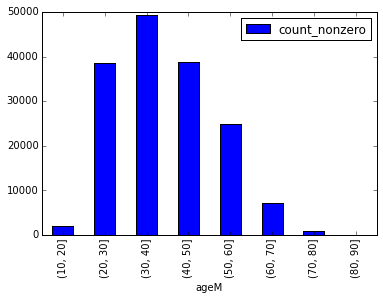

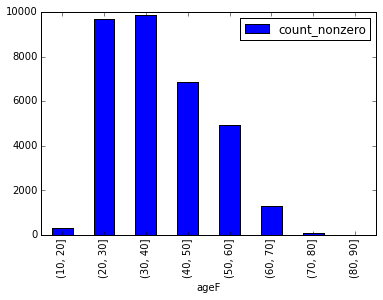

In [14]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.002160
(20, 30]       0.052312
(30, 40]       0.044676
(40, 50]       0.012573
(50, 60]       0.008436
(60, 70]       0.003543
(70, 80]       0.000207
(80, 90]       0.000000


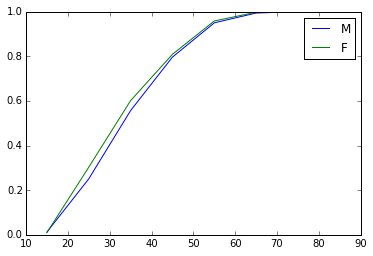

In [15]:
#create a cumulative distribution
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [18]:
#KS Test
import scipy.stats

In [19]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

In [20]:
print ks

(0.65250088864063371, 0.0)


In [ ]:
#The result shows that p value is equal to zero which means that they do not have the same distribution.
#The test result is 0,652500... which is smaller than 0,05. The null hypothesis must be rejected. 

In [21]:
#Pearson test
import scipy.stats

In [22]:
scipy.stats.pearsonr(df.ageM, df.ageF)

(nan, 1.0)

In [ ]:
#Pearson test measures the degree of the relationship between linear variables.Here,the Pearson test value is nan.
#The value of the coefficient ratio r should be between -1 and 1.So the value of the covariance is irrelevant.
#In the calculation process, pearson uses in the ratio part multiplicatio of the two std of the Male and Female age. One of them may be "0" for getting the result nan.


In [ ]:
#Spearman test

In [23]:
scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)

(-0.413687473007469, 0.0)

In [ ]:
#When the variables are not normally distributed or the relationship between the variables is not linear, 
#it is more appropriate to use the Spearman rank correlation method.
#Here,t is the power of the spearman's test and value : -0,41368...shows that these two distribution are negatively correlated and when one group age increases other group age decreases as coefficient value: -0,4136... 
#P value,which is zero,indicates that the two variables do not vary together at all.

In [24]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
from datetime import datetime

import os

#dataframe for starttime,hour
df['starttime'] = pd.to_datetime(df['starttime'])
df['hour'] = df['starttime'].dt.hour

Populating the interactive namespace from numpy and matplotlib


In [28]:
#day and night riders age distribution. Night riders are defined between 7pm-8am. Day riders are defined between 8am-7pm.
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] > 19) | (df['hour'] < 8 )]
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour'] <= 19) & (df['hour'] >= 8 ))]

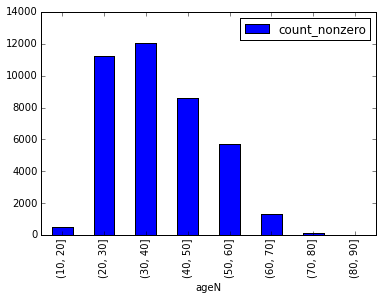

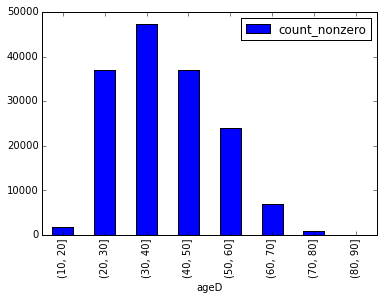

In [27]:
bins = np.arange(10, 99, 10)
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.002089
(20, 30]       0.046719
(30, 40]       0.046352
(40, 50]       0.024488
(50, 60]       0.014406
(60, 70]       0.002984
(70, 80]       0.000019
(80, 90]       0.000000


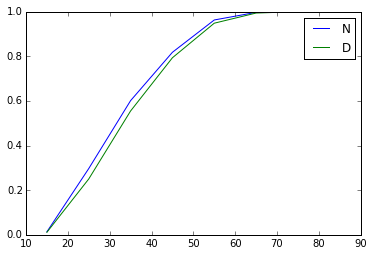

In [29]:
#cumulative distribution

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.legend()

In [ ]:
#KS test

In [31]:
ks=scipy.stats.ks_2samp(df.ageN, df.ageD)

In [32]:
print ks

(0.58646727263494647, 0.0)


In [30]:
#P-value is equal to 0 and it means that two sample do not come from the same parent distribution.
#Our test result is 0.58646.... and this value smaller than the table value c(alpha) at 0.05 alpha value 1,36. As a result we must reject the null hypothesis

In [ ]:
#Pearson test

In [34]:
ageD_arr = df.ageD
ageN_arr = df.ageN
ageD_arr = ageD_arr[~numpy.isnan(ageD_arr)]
ageN_arr = ageN_arr[~numpy.isnan(ageN_arr)]
ageD_arr = np.random.choice(ageD_arr,20000, replace=False)
ageN_arr = np.random.choice(ageN_arr,20000, replace=False)

print ageD_arr
print ageN_arr

[ 41.  51.  26. ...,  30.  27.  33.]
[ 36.  32.  36. ...,  23.  34.  57.]


In [35]:
scipy.stats.pearsonr (ageD_arr, ageN_arr)

(0.0025932955004323494, 0.71382411106552235)

In [ ]:
#The correlation coefficient is 0,0025 (around 0) , which means that these two distributions are not correlated.

In [36]:
scipy.stats.spearmanr(ageD_arr, ageN_arr, axis=0)

(-0.00058145226637402797, 0.93446808344549392)